# 主成分分析[PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


特征选择： 从所有特征选择一个子集，维度下降

特征降维：特征数不变，但通过变换到低维空间里，维度下降

## 0. 引入相关模块

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

## 1. 加载数据集 

手写数字数据集：每个样本为一个64维的向量，即一张8*8的灰色图像。

In [3]:
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

### 1.1 查看数据集

In [4]:
print(X_digits.shape)

(1797, 64)


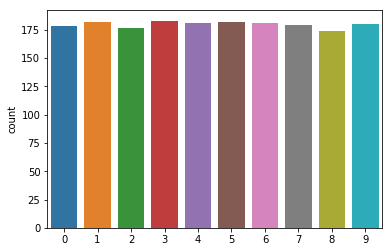

In [5]:
sns.countplot(y_digits)

### 1.2 查看图片数据

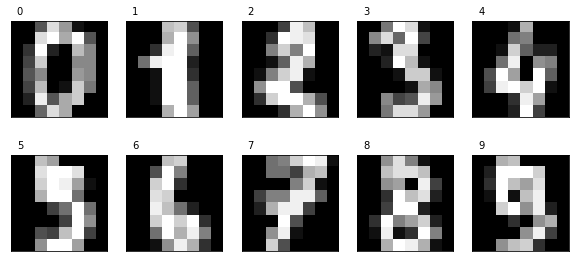

In [6]:
n_row, n_col = 2, 5

def plot_digits(X, y, max_n=10):
    """
        显示手写数字的图像
    """
    images = X.reshape((-1, 8, 8))
    # 设置图像尺寸
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap='gray', interpolation='nearest')
        # 添加标签
        p.text(0, -1, str(y[i]))
        i = i + 1
    
plot_digits(X_digits, y_digits, max_n=10)

## 2. 主成分分析

In [19]:
n_components = 10 # 取前10个主成分
# when n_components = float: 把float当成累计贡献率进行计算
pca = PCA(n_components)
X_pca = pca.fit_transform(X_digits)

In [20]:
print(X_pca.shape)

(1797, 10)


### 2.1 可视化主成分

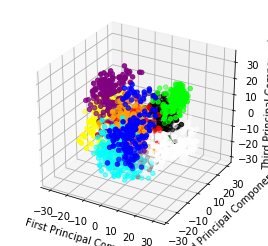

In [27]:
from mpl_toolkits.mplot3d import Axes3D
def plot_pca_scatter(X_pca):
    """
        主成分显示
    """
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d', aspect='equal')
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        # 只显示前两个主成分在二维坐标系中
        # 如果想显示前三个主成分，可以放在三维坐标系中。有兴趣的可以自己尝试下
        
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        pz = X_pca[:, 2][y_digits == i]
       # plt.scatter(px, py, pz,c=colors[i])
        ax1.scatter(px,py,pz,c=colors[i])
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.set_zlabel('Third Principal Component')
    plt.show()
plot_pca_scatter(X_pca)


### 2.2 可视化主成分对应的图片

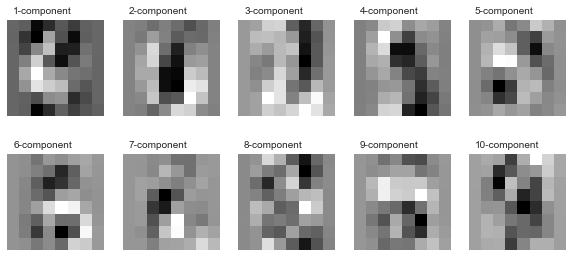

In [9]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), cmap='gray', interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())
        
print_pca_components(pca.components_[:n_components], n_col, n_row)

每幅图显示的是所有样本中计算出的1-10个主成分，不同的主成分描述了不同的特征。
比如第二幅图显示的是第2个特征向量，可以看出区别的是0和其他数字，因为0的中间是空的，其他数字则不是。
所以PCA可用于图像的特征提取。